In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,100000)

In [6]:
noise = np.random.randn(len(x_data))

In [7]:
noise

array([ 0.20913309, -0.17273475,  0.31250844, ...,  0.57313924,
       -0.47823818,  1.50187539])

y = mx + b

b = 5

In [9]:
y_true = (0.5 * x_data) + 5 + noise

In [11]:
y_true

array([ 5.20913309,  4.82731525,  5.31260844, ..., 10.57303924,
        9.52171182, 11.50187539])

In [12]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [14]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [16]:
my_data = pd.concat([x_df, y_df], axis=1)

In [17]:
my_data.head()

,X Data,Y
0,0.0000,5.209133
1,0.0001,4.827315
2,0.0002,5.312608
3,0.0003,5.874130
4,0.0004,4.992972


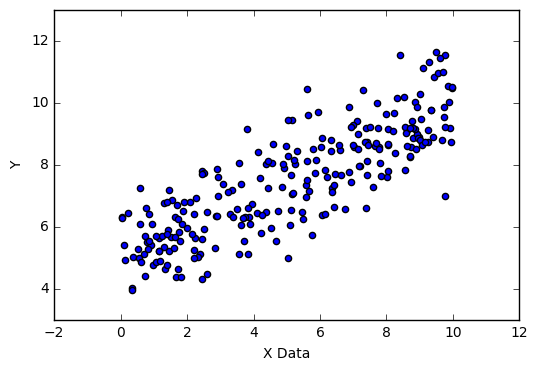

In [19]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [21]:
batch_size = 8

In [24]:
np.random.randn(2)

array([0.83370169, 0.20013607])

In [25]:
m = tf.Variable(0.81)
b = tf.Variable(0.18)

In [26]:
xph = tf.placeholder(tf.float32,[batch_size])

In [27]:
yph = tf.placeholder(tf.float32,[batch_size])

In [30]:
y_model = m * xph + b

In [32]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [35]:
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])

In [38]:
model_m

0.45860556

In [39]:
model_b

4.95015

In [40]:
y_hat = x_data*model_m + model_b

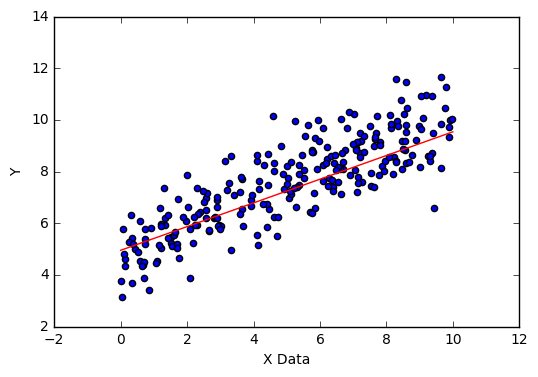

In [42]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')